# Superbowl data Analysis

In [161]:
# Dependencies and Set up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
import csv
from pprint import pprint

from config import api_key

# Datasets/studies
superbowl_data_path = "Resources/superbowl_commercials.csv"
base_url = "https://www.alphavantage.co/query?"
apikey =  api_key

# Read data in
superbowl_data = pd.read_csv(superbowl_data_path)

In [81]:
## Finding the number of total ads each Brand had between 2000-2021
# Get counts of each brand
brand_counts = superbowl_data['Brand'].value_counts()

# Create a list of brands and their counts
brands_list = []
for brand, count in brand_counts.items():
    brands_list.append((brand, count))

# Display the list
for brand, count in brands_list:
    print(f"{brand}: {count}")

Bud Light: 62
Budweiser: 43
Doritos: 26
Pepsi: 25
Hyundai: 22
Coca-Cola: 21
E-Trade: 14
Kia: 13
Toyota: 12
NFL: 11


In [188]:
## Finding top 5 most watche YouTube views
# Convert 'YouTube Views' column to numeric
superbowl_data['Youtube Views'] = pd.to_numeric(superbowl_data['Youtube Views'], errors='coerce')

# Drop rows with missing YouTube Views
superbowl_data.dropna(subset=['Youtube Views'], inplace=True)

# Get the index of the row with the highest YouTube views for each brand
top_views_indices = superbowl_data.groupby('Brand')['Youtube Views'].idxmax()

# Get the rows corresponding to the indices
top_views_videos = superbowl_data.loc[top_views_indices]

#Sort the DataFrame based on 'Youtube Views' column in descending order
top_views_videos_sorted = top_views_videos.sort_values(by='Youtube Views', ascending=False)


# Display the top viewed videos for each brand
print("Top Viewed Videos for Each Brand:")
print(top_views_videos_sorted[['Brand', 'Youtube Views', 'Youtube Likes', 'Year', 'Estimated Cost']])

Top Viewed Videos for Each Brand:
         Brand  Youtube Views  Youtube Likes  Year  Estimated Cost
147    Doritos    181423810.0       295000.0  2012            2.95
241        NFL     33318675.0       202000.0  2020           31.73
204  Budweiser     28795017.0        48000.0  2017           10.80
145  Coca-Cola     23976557.0       100000.0  2012            5.90
234  Bud Light      7678655.0        94000.0  2019           10.40
245     Toyota      1399700.0        12000.0  2021           11.00
122    E-Trade      1048750.0         1200.0  2010            2.95
211      Pepsi       736511.0         3200.0  2018           10.48
99     Hyundai       373823.0          588.0  2009            2.40
203        Kia       145269.0         1400.0  2017           13.50


In [83]:
# Convert 'YouTube Views' column to numeric
superbowl_data['Youtube Views'] = pd.to_numeric(superbowl_data['Youtube Views'], errors='coerce')

# Drop rows with missing YouTube Views
superbowl_data.dropna(subset=['Youtube Views'], inplace=True)

# Get the index of the row with the lowest YouTube views for each brand
bottom_views_indices = superbowl_data.groupby('Brand')['Youtube Views'].idxmin()

# Get the rows corresponding to the indices
bottom_views_videos = superbowl_data.loc[bottom_views_indices]

# Sort the DataFrame based on 'Youtube Views' column in ascending order (to get bottom viewed videos)
bottom_views_videos_sorted = bottom_views_videos.sort_values(by='Youtube Views', ascending=True)

# Display the bottom viewed videos for each brand
print("Bottom Viewed Videos for Each Brand:")
print(bottom_views_videos_sorted[['Brand', 'Youtube Views', 'Youtube Likes', 'Year', 'Estimated Cost']])

Bottom Viewed Videos for Each Brand:
         Brand  Youtube Views  Youtube Likes  Year  Estimated Cost
212        NFL            5.0            0.0  2018           10.48
144  Budweiser           27.0            0.0  2012            5.90
134    E-Trade           27.0            0.0  2012            2.95
132    Hyundai           63.0            0.0  2011            2.95
5    Bud Light          146.0            3.0  2000            2.10
55       Pepsi          219.0            1.0  2005            3.60
209  Coca-Cola          353.0            2.0  2018            5.24
232        Kia          605.0            2.0  2019            5.20
15     Doritos         4183.0           15.0  2001            2.10
227     Toyota         6057.0           39.0  2019           10.40


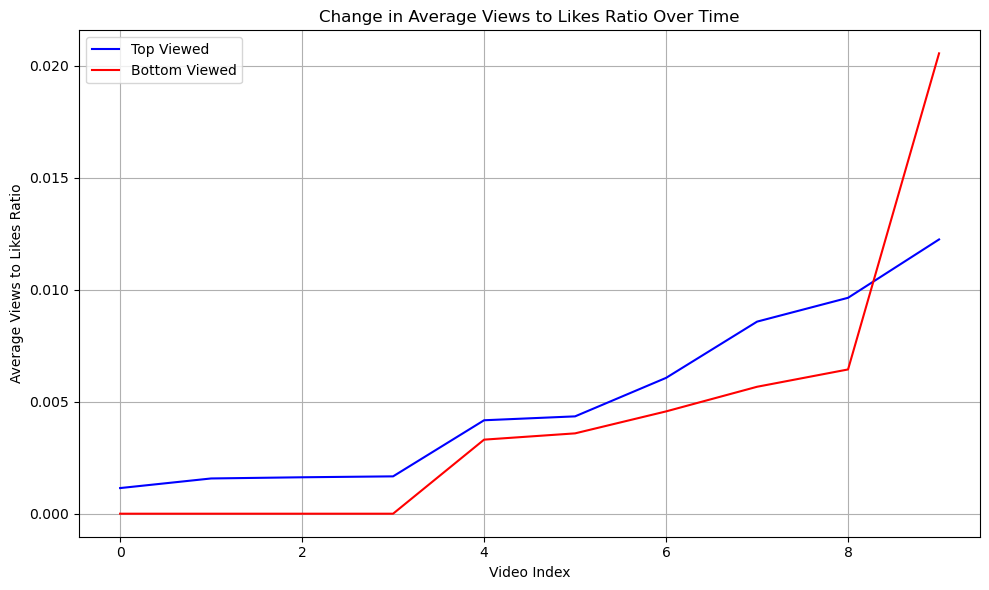

In [194]:

# Calculate the average views to likes ratio for top viewed videos
top_views_ratio = top_views_videos_sorted['Youtube Likes'] / top_views_videos_sorted['Youtube Views']

# Calculate the average views to likes ratio for bottom viewed videos
bottom_views_ratio = bottom_views_videos_sorted['Youtube Likes'] / bottom_views_videos_sorted['Youtube Views']

# Sort the data in ascending order
top_views_ratio = top_views_ratio.sort_values(ascending=True)
bottom_views_ratio = bottom_views_ratio.sort_values(ascending=True)

# Plot the change in the average views to likes ratio over time using a line graph
plt.figure(figsize=(10, 6))

# Plot top views ratio
plt.plot(top_views_ratio.values, color='blue', label='Top Viewed')

# Plot bottom views ratio
plt.plot(bottom_views_ratio.values, color='red', label='Bottom Viewed')

plt.title('Change in Average Views to Likes Ratio Over Time')
plt.xlabel('Video Index')
plt.ylabel('Average Views to Likes Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [196]:

# Extract views data for each type of commercial (top viewed and bottom viewed)
top_views = top_views_videos_sorted['Youtube Views']
bottom_views = bottom_views_videos_sorted['Youtube Views']

# Perform ANOVA test
anova_result = st.f_oneway(top_views, bottom_views)

# Perform Kruskal-Wallis test
kruskal_result = st.kruskal(top_views, bottom_views)

# Print results
print("ANOVA Test:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

print("\nKruskal-Wallis Test:")
print("H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

ANOVA Test:
F-statistic: 2.525848324882203
p-value: 0.12940442456060333

Kruskal-Wallis Test:
H-statistic: 14.29646350639578
p-value: 0.00015615798169106888


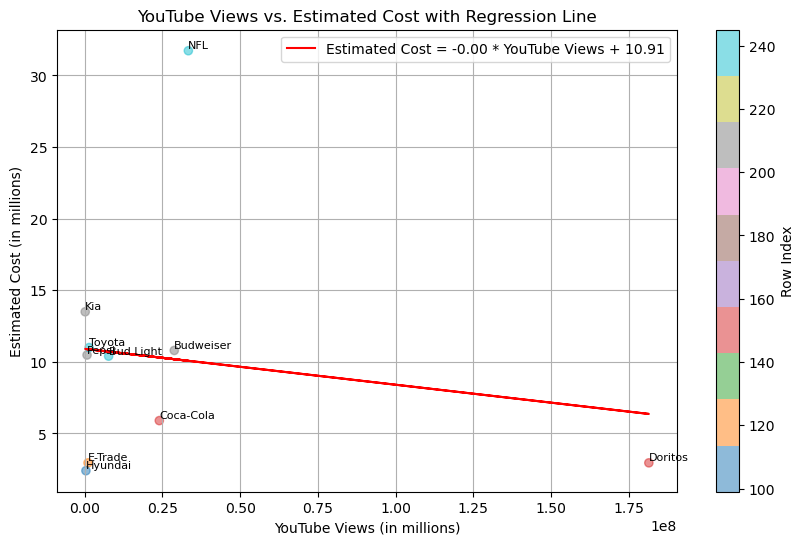

In [84]:
# You can replace these with your actual column names from your DataFrame
youtube_views = top_views_videos['Youtube Views']
estimated_cost = top_views_videos['Estimated Cost']
brand_names = top_views_videos['Brand']

# Calculate the coefficients (slope and intercept) of the regression line
slope, intercept = np.polyfit(youtube_views, estimated_cost, 1)

# Create the regression line equation
regression_line = f'Estimated Cost = {slope:.2f} * YouTube Views + {intercept:.2f}'

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(youtube_views, estimated_cost, c=top_views_videos.index, cmap='tab10', alpha=0.5)  # Use DataFrame index as color

# Plot the regression line
plt.plot(youtube_views, slope * youtube_views + intercept, color='red', label=regression_line)

# Add brand names next to each point
for x, y, brand in zip(youtube_views, estimated_cost, brand_names):
    plt.text(x, y, brand, fontsize=8, ha='left', va='bottom')

# Add labels and title
plt.title('YouTube Views vs. Estimated Cost with Regression Line')
plt.xlabel('YouTube Views (in millions)')
plt.ylabel('Estimated Cost (in millions)')
plt.legend()

# Add a colorbar to show the mapping of colors to rows
plt.colorbar(label='Row Index')

# Display the plot
plt.grid(True)
plt.show()

#### After analyzing the relationship between YouTube Views and Estimated Cost, the regression line indicates that there is no discernible correlation between the cost of an advertisement and the number of views it receives. This suggests that variations in ad expenditure do not significantly influence viewership on YouTube.

In [85]:
# Sort the DataFrame by 'Youtube Likes' column in descending order
top_liked_videos_sorted = top_views_videos.sort_values(by='Youtube Likes', ascending=False)

# Print the sorted DataFrame
print("Top Viewed Videos Sorted by YouTube Likes (Descending Order):")
print(top_liked_videos_sorted[['Brand', 'Youtube Views', 'Youtube Likes', 'Year']])

Top Viewed Videos Sorted by YouTube Likes (Descending Order):
         Brand  Youtube Views  Youtube Likes  Year
147    Doritos    181423810.0       295000.0  2012
241        NFL     33318675.0       202000.0  2020
145  Coca-Cola     23976557.0       100000.0  2012
234  Bud Light      7678655.0        94000.0  2019
204  Budweiser     28795017.0        48000.0  2017
245     Toyota      1399700.0        12000.0  2021
211      Pepsi       736511.0         3200.0  2018
203        Kia       145269.0         1400.0  2017
122    E-Trade      1048750.0         1200.0  2010
99     Hyundai       373823.0          588.0  2009


In [88]:
# Drop the 'YouTube Link' and 'Superbowl Ads Link' columns
top_views_videos.drop(columns=['Youtube Link', 'Superbowl Ads Link'], inplace=True)

top_views_videos.head()

,Year,Brand,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
234,2019,Bud Light,True,True,False,False,True,True,False,60,10.40,7678655.0,94000.0,98.19
204,2017,Budweiser,False,False,True,False,True,False,False,60,10.80,28795017.0,48000.0,111.32
145,2012,Coca-Cola,False,True,False,False,True,True,False,60,5.90,23976557.0,100000.0,111.35
147,2012,Doritos,True,True,False,False,False,False,False,30,2.95,181423810.0,295000.0,111.35
122,2010,E-Trade,True,True,False,False,False,False,True,30,2.95,1048750.0,1200.0,106.48


In [89]:
# List of columns to count True values
columns_to_count = ['Funny', 'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals', 'Uses Sex']

# Count the number of True values across the specified columns
true_counts = superbowl_data[columns_to_count].sum()

print("Counts of True values across columns:")
print(true_counts)

Counts of True values across columns:
Funny                    165
Shows Product Quickly    161
Patriotic                 41
Celebrity                 69
Danger                    77
Animals                   87
Uses Sex                  58
dtype: int64


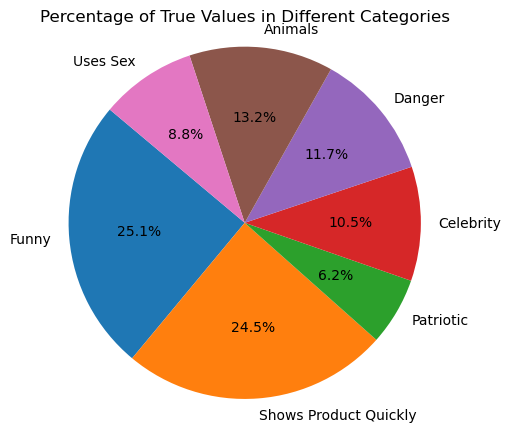

In [90]:
# List of columns to count True values
columns_to_count = ['Funny', 'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals', 'Uses Sex']

# Count the number of True values across the specified columns
true_counts = superbowl_data[columns_to_count].sum()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(true_counts, labels=true_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of True Values in Different Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [91]:
# Count the number of True values across the specified columns
top_viewed_count = top_views_videos[columns_to_count].sum()

print("Counts of True values across columns:")
print(top_viewed_count)

Counts of True values across columns:
Funny                    5
Shows Product Quickly    6
Patriotic                4
Celebrity                3
Danger                   4
Animals                  3
Uses Sex                 1
dtype: int64


In [92]:
# Count the number of True values across the specified columns
bottom_viewed_count = bottom_views_videos[columns_to_count].sum()

print("Counts of bottom viewed values across columns:")
print(bottom_viewed_count)

Counts of bottom viewed values across columns:
Funny                    5
Shows Product Quickly    6
Patriotic                2
Celebrity                3
Danger                   1
Animals                  2
Uses Sex                 2
dtype: int64


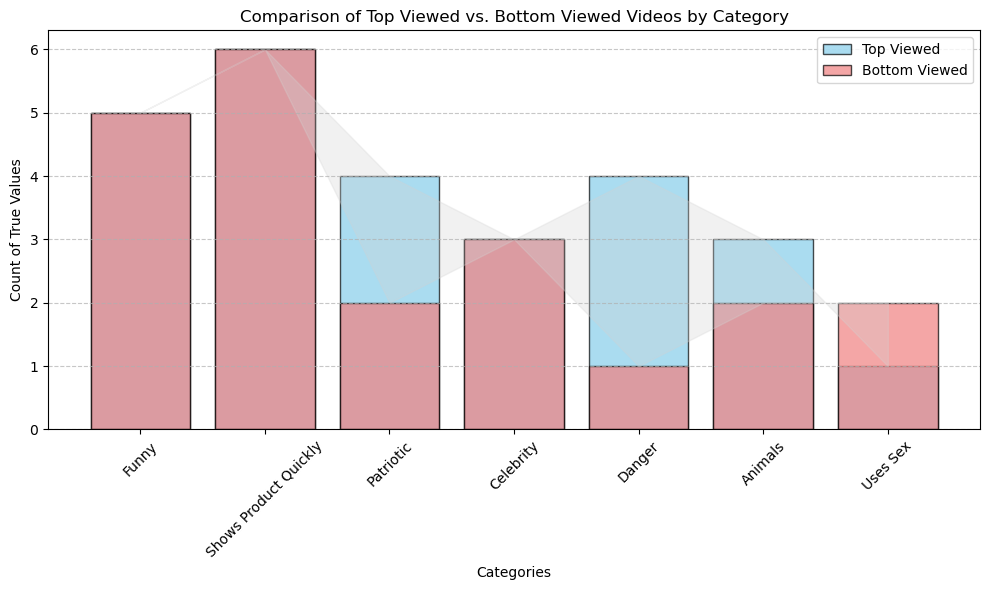

In [62]:
# Define the columns to count
columns_to_count = ['Funny', 'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals', 'Uses Sex']

# Count the number of True values across the specified columns for top viewed videos
top_viewed_count = top_views_videos[columns_to_count].sum()

# Count the number of True values across the specified columns for bottom viewed videos
bottom_viewed_count = bottom_views_videos[columns_to_count].sum()

# Create a bar plot to compare the counts
plt.figure(figsize=(10, 6))

# Plot the bars for top viewed videos
plt.bar(columns_to_count, top_viewed_count, label='Top Viewed', color='skyblue', alpha=0.7, edgecolor='black')

# Plot the bars for bottom viewed videos
plt.bar(columns_to_count, bottom_viewed_count, label='Bottom Viewed', color='lightcoral', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count of True Values')
plt.title('Comparison of Top Viewed vs. Bottom Viewed Videos by Category')
plt.xticks(rotation=45)
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add shading
plt.axhline(0, color='black', linewidth=0.5)
plt.fill_between(columns_to_count, top_viewed_count, bottom_viewed_count, color='lightgrey', alpha=0.3)

plt.tight_layout()
plt.show()

In [182]:
# Filter the superbowl_data DataFrame to get rows where Brand is 'Doritos'
doritos_df = superbowl_data[superbowl_data['Brand'] == 'Doritos']

# Print the new DataFrame
print(doritos_df)

     Year    Brand                                 Superbowl Ads Link  \
15   2001  Doritos  https://superbowl-ads.com/2001-doritos-ali-lan...   
72   2007  Doritos  https://superbowl-ads.com/2007-doritos-live-th...   
82   2007  Doritos  https://superbowl-ads.com/2007-doritos-check-o...   
89   2008  Doritos  https://superbowl-ads.com/2008-doritos-mouse-t...   
100  2009  Doritos  https://superbowl-ads.com/2009-doritos-new-fla...   
105  2009  Doritos  https://superbowl-ads.com/2009-doritos-power-o...   
108  2009  Doritos  https://superbowl-ads.com/2009-doritos-crystal...   
115  2010  Doritos  https://superbowl-ads.com/hd-exclusive-doritos...   
116  2010  Doritos  https://superbowl-ads.com/hd-exclusive-casket-...   
118  2010  Doritos  https://superbowl-ads.com/hd-exclusive-dog-sho...   
130  2011  Doritos  https://superbowl-ads.com/2011-doritos-pug-att...   
138  2012  Doritos  https://superbowl-ads.com/2012-doritos-mans-be...   
147  2012  Doritos  https://superbowl-ads.com/2012-

In [104]:
# Define the symbols and corresponding brand names
symbols = {
    "Doritos": "PEP",
}

# Define the year and month range
year_month_range = {
    "start_year": 2012,
    "end_year": 2021,
    "start_month": 1,  # January
    "end_month": 4     # April
}

# Open a new CSV file in write mode
with open("stock_information.csv", mode="w", newline="") as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)
    
    # Write the header row
    csv_writer.writerow(["Brand", "Year", "Month", "Stock Information"])
    
    # Loop through each brand and make API request for stock data
    for brand, symbol in symbols.items():
        # Loop through each year and month within the specified range
        for year in range(year_month_range["start_year"], year_month_range["end_year"] + 1):
            for month in range(year_month_range["start_month"], year_month_range["end_month"] + 1):
                # Parameters for the API request
                params = {
                    "function": "TIME_SERIES_MONTHLY",  # Function to retrieve monthly time series data
                    "symbol": symbol,  # Stock symbol
                    "apikey": api_key  # Your API key
                }

                # Make the API request
                response = requests.get(base_url, params=params)

                # Check if the request was successful (status code 200)
                if response.status_code == 200:
                    # Convert the response to JSON format
                    data = response.json()
                    # Write the stock information to the CSV file
                    csv_writer.writerow([brand, year, month, json.dumps(data)])
                else:
                    print(f"Error retrieving stock information for {brand}: {response.status_code}")

In [153]:
# Read in doritos stock information
doritos_stock_path = "stock_information.csv"

doritos_stock = pd.read_csv(doritos_stock_path)

doritos_stock.head()

,Brand,Year,Month,Stock Information
0,Doritos,2012,1,"{""Meta Data"": {""1. Information"": ""Monthly Pric..."
1,Doritos,2012,2,"{""Meta Data"": {""1. Information"": ""Monthly Pric..."
2,Doritos,2012,3,"{""Meta Data"": {""1. Information"": ""Monthly Pric..."
3,Doritos,2012,4,"{""Meta Data"": {""1. Information"": ""Monthly Pric..."
4,Doritos,2013,1,"{""Meta Data"": {""1. Information"": ""Monthly Pric..."


In [180]:
# Drop index rows 20 to 39 for lack of targeted information
doritos_stock = doritos_stock.drop(doritos_stock.index[20:40])

# Reset the index
doritos_stock = doritos_stock.reset_index(drop=True)

In [158]:
# Iterate over each row in the "Stock Information" column
for stock_info in doritos_stock['Stock Information']:
    # Decode the escaped characters and load the JSON string into a Python object
    stock_info_dict = json.loads(stock_info.replace('\\"', '"'))
    # Pretty-print the decoded JSON
    pprint(stock_info_dict)

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and '
                                 'Volumes',
               '2. Symbol': 'PEP',
               '3. Last Refreshed': '2024-05-14',
               '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'1999-12-31': {'1. open': '34.3100',
                                        '2. high': '37.7500',
                                        '3. low': '33.8100',
                                        '4. close': '35.2500',
                                        '5. volume': '93996500'},
                         '2000-01-31': {'1. open': '35.3800',
                                        '2. high': '38.6300',
                                        '3. low': '33.1900',
                                        '4. close': '34.1300',
                                        '5. volume': '95170300'},
                         '2000-02-29': {'1. open': '34.0000',
                                        '2. high': '35.

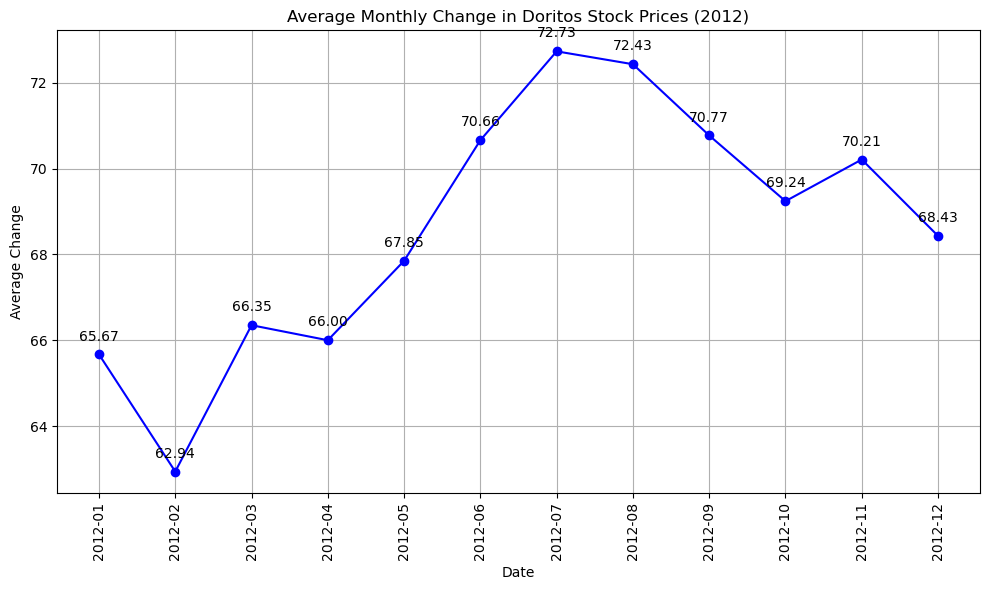

In [187]:
## Create a line graph for 2012 Doritos
# Initialize dictionaries to store monthly changes
monthly_changes_2012 = {}

# Iterate over each row in the "Stock Information" column
for stock_info in doritos_stock['Stock Information']:
    # Decode the escaped characters and load the JSON string into a Python object
    stock_info_dict = json.loads(stock_info.replace('\\"', '"'))
    # Extract the monthly changes for the year 2012
    for date, data in stock_info_dict['Monthly Time Series'].items():
        year = int(date[:4])  # Extract the year from the date
        if year == 2012:
            month = date[:7]  # Extract the year-month part of the date
            closing_price = float(data['4. close'])
            if month in monthly_changes:
                monthly_changes[month].append(closing_price)
            else:
                monthly_changes[month] = [closing_price]

# Calculate the average change for each month in 2012
average_changes_2012 = {month: np.mean(prices) for month, prices in monthly_changes.items()}

# Sort the dictionary keys (dates) in ascending order
sorted_months = sorted(average_changes_2012.keys())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot([average_changes_2012[month] for month in sorted_months], color='b', marker='o', linestyle='-')
plt.title('Average Monthly Change in Doritos Stock Prices (2012)')
plt.xlabel('Date')
plt.ylabel('Average Change')
plt.xticks(ticks=range(len(sorted_months)), labels=sorted_months, rotation=90)  # Set custom tick labels
plt.grid(True)

# Add mean values as annotations
for i, month in enumerate(sorted_months):
    plt.annotate(f"{average_changes_2012[month]:.2f}", (i, average_changes_2012[month]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

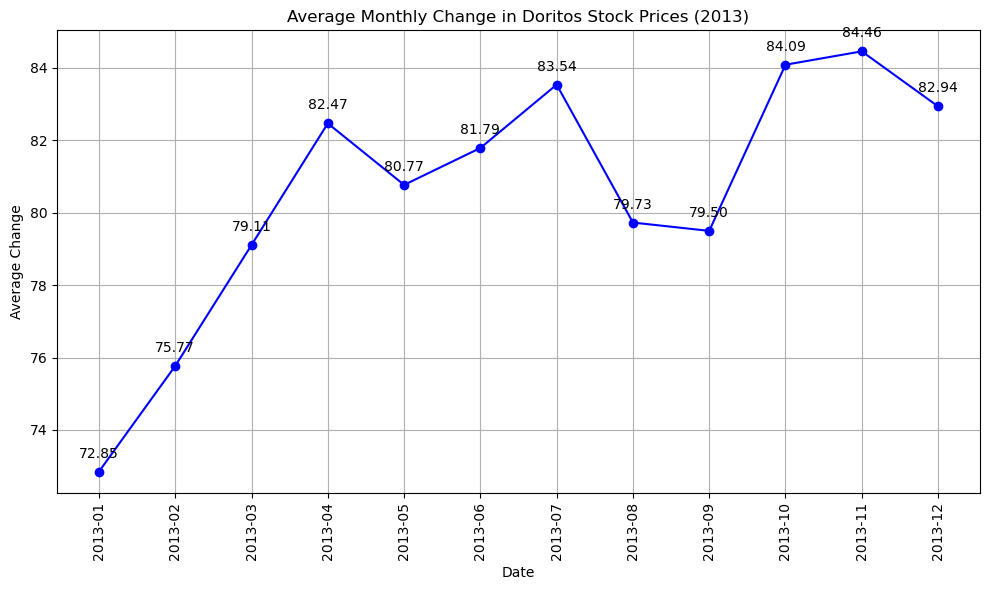

In [186]:
## Create a line graph for 2013 Doritos 
# Initialize dictionaries to store monthly changes for 2013
monthly_changes_2013 = {}

# Iterate over each row in the "Stock Information" column
for stock_info in doritos_stock['Stock Information']:
    # Decode the escaped characters and load the JSON string into a Python object
    stock_info_dict = json.loads(stock_info.replace('\\"', '"'))
    # Extract the monthly changes for the year 2013
    for date, data in stock_info_dict['Monthly Time Series'].items():
        year = int(date[:4])  # Extract the year from the date
        if year == 2013:
            month = date[:7]  # Extract the year-month part of the date
            closing_price = float(data['4. close'])
            if month in monthly_changes_2013:
                monthly_changes_2013[month].append(closing_price)
            else:
                monthly_changes_2013[month] = [closing_price]

# Calculate the average change for each month in 2013
average_changes_2013 = {month: np.mean(prices) for month, prices in monthly_changes_2013.items()}

# Sort the dictionary keys (dates) in ascending order
sorted_months_2013 = sorted(average_changes_2013.keys())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot([average_changes_2013[month] for month in sorted_months_2013], color='b', marker='o', linestyle='-')
plt.title('Average Monthly Change in Doritos Stock Prices (2013)')
plt.xlabel('Date')
plt.ylabel('Average Change')
plt.xticks(ticks=range(len(sorted_months_2013)), labels=sorted_months_2013, rotation=90)  # Set custom tick labels
plt.grid(True)

# Add mean values as annotations
for i, month in enumerate(sorted_months_2013):
    plt.annotate(f"{average_changes_2013[month]:.2f}", (i, average_changes_2013[month]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()